
# Water-Consumption-Forecasting


**What's included**
- water_data.csv — a small synthetic dataset

**Steps Followed**

- Load dataset and inspect it.

- Clean (drop duplicates, check missing values).

- Visualize correlations and relationships.

- Train a Random Forest regression model to predict water requirement.

- Evaluate with MAE, RMSE, and R².

- Plot actual vs predicted and feature importance.

- Save the trained model for future use.

- Forecast future years (2030–2035) based on trend assumptions.

**Goal:** To forecast future water requirements (in TMC) for a region using machine learning (Random Forest Regression), based on key demographic, industrial, and environmental factors.


In [1]:
# 1. Load libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [4]:
# Load dataset
df = pd.read_csv("/content/water_data.csv")   # <-- save your 2000–2029 dataset to this CSV
print(df.head())
print(df.tail())
print(df.describe())
print(df.info())

   Year  Population  Reservoir_Capacity_TMC  Number_of_Dams  \
0  2000      465795              318.318092               6   
1  2001      485342              322.803499               5   
2  2002      595785              339.258798               6   
3  2003      608334              309.983689               4   
4  2004      594196              325.711722               4   

   Number_of_Industries  Average_Temp_C  Irrigation_Area_Ha  \
0                   102       25.246461        10397.000000   
1                   109       26.120880        10867.413793   
2                   129       27.915687        10975.827586   
3                   134       25.350887        11012.241379   
4                   146       24.660762        10945.655172   

   Water_Requirement_TMC  
0             345.006711  
1             355.437776  
2             352.416868  
3             383.130236  
4             387.277045  
    Year  Population  Reservoir_Capacity_TMC  Number_of_Dams  \
25  2025     140

#Quick data info & simple cleaning

In [5]:
# Drop duplicates if any
df = df.drop_duplicates()

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Year                      0
Population                0
Reservoir_Capacity_TMC    0
Number_of_Dams            0
Number_of_Industries      0
Average_Temp_C            0
Irrigation_Area_Ha        0
Water_Requirement_TMC     0
dtype: int64


#Visualizations

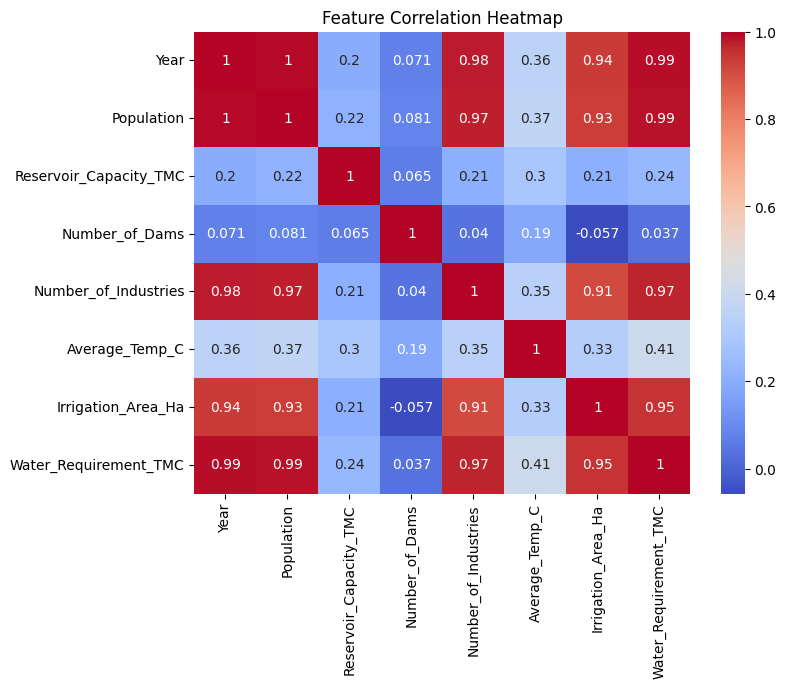

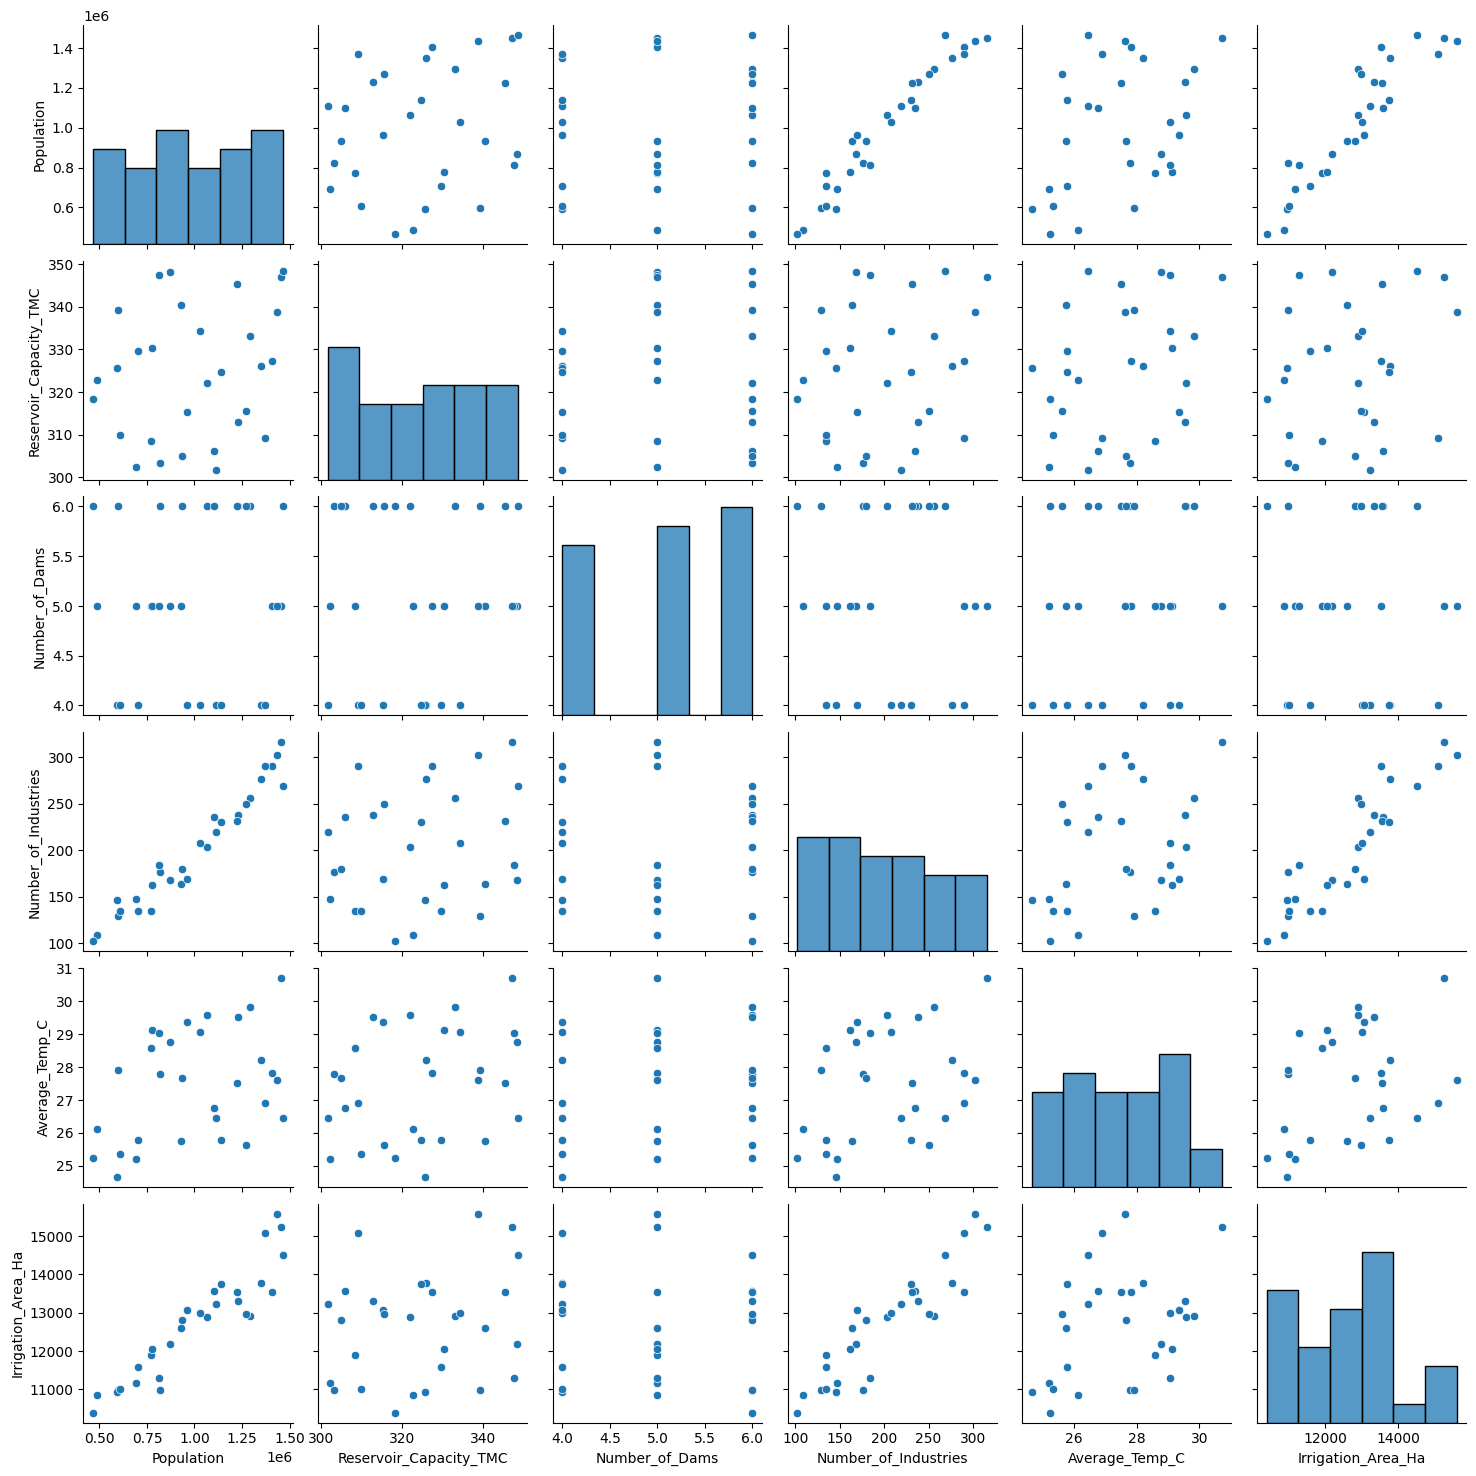

In [8]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot of key features vs target
sns.pairplot(df.sample(30), vars=['Population','Reservoir_Capacity_TMC',
                                   'Number_of_Dams','Number_of_Industries',
                                   'Average_Temp_C','Irrigation_Area_Ha'],
             y_vars=['Water_Requirement_TMC'])
plt.show()

#Regression Model (Random Forest)

In [9]:
# Define features and target
X = df[['Year','Population','Reservoir_Capacity_TMC',
        'Number_of_Dams','Number_of_Industries',
        'Average_Temp_C','Irrigation_Area_Ha']]
y = df['Water_Requirement_TMC']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features (not necessary for RF, but good practice for other models)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train_s, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

#Predict & evaluate

MAE: 54.78451806223353
RMSE: 59.550939567655334
R² Score: -5.308270802626254


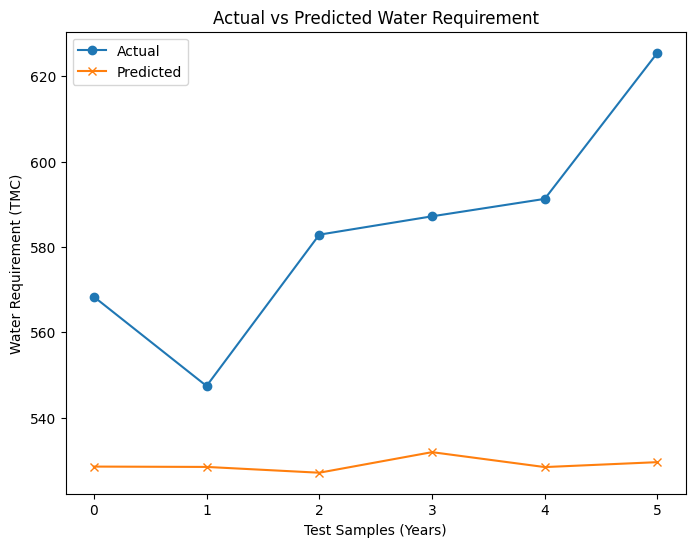

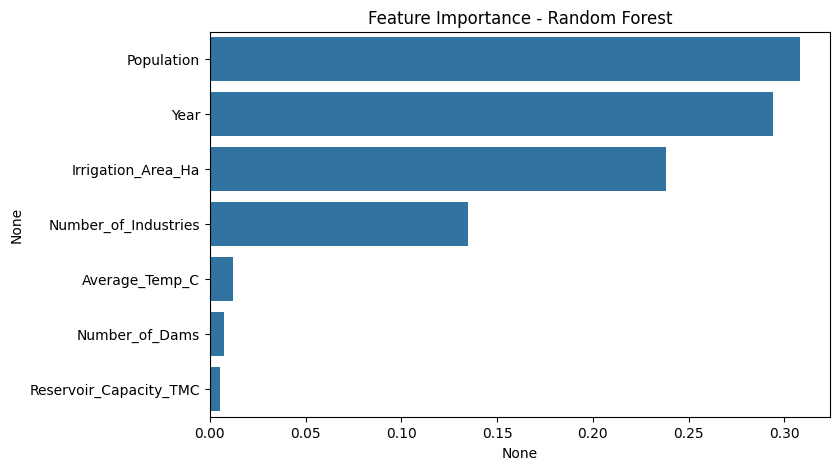

In [11]:
y_pred = rf.predict(X_test_s)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("R² Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.plot(y_test.values, label="Actual", marker="o")
plt.plot(y_pred, label="Predicted", marker="x")
plt.legend()
plt.title("Actual vs Predicted Water Requirement")
plt.xlabel("Test Samples (Years)")
plt.ylabel("Water Requirement (TMC)")
plt.show()

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance - Random Forest")
plt.show()

#Forecasting (Example: predict 2030–2035 with trend values)

In [13]:
future_years = pd.DataFrame({
    "Year": [2030, 2031, 2032, 2033, 2034, 2035],
    "Population": [1500000, 1550000, 1600000, 1650000, 1700000, 1750000],  # replace with realistic projections
    "Reservoir_Capacity_TMC": [350, 355, 360, 365, 370, 375],
    "Number_of_Dams": [6, 6, 7, 7, 7, 8],
    "Number_of_Industries": [320, 330, 340, 350, 360, 370],
    "Average_Temp_C": [28, 28.5, 29, 29.5, 30, 30.5],
    "Irrigation_Area_Ha": [16000, 16500, 17000, 17500, 18000, 18500]
})

future_scaled = scaler.transform(future_years)
future_preds = rf.predict(future_scaled)
future_years["Predicted_Water_Requirement_TMC"] = future_preds
print(future_years)

   Year  Population  Reservoir_Capacity_TMC  Number_of_Dams  \
0  2030     1500000                     350               6   
1  2031     1550000                     355               6   
2  2032     1600000                     360               7   
3  2033     1650000                     365               7   
4  2034     1700000                     370               7   
5  2035     1750000                     375               8   

   Number_of_Industries  Average_Temp_C  Irrigation_Area_Ha  \
0                   320            28.0               16000   
1                   330            28.5               16500   
2                   340            29.0               17000   
3                   350            29.5               17500   
4                   360            30.0               18000   
5                   370            30.5               18500   

   Predicted_Water_Requirement_TMC  
0                       532.014777  
1                       532.044176  
2    